# HEATWAVE ANALYSIS ON TEMPERATURE DATA


In [9]:
from bisect import bisect_left
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import Functions_Research as FR
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau


import scipy
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
#RMSE 
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime
import seaborn as sns

from numpy.random import Generator, PCG64
import random

seed_value = int('1CE32819E40', 16)  # Convert hexadecimal to integer
random.seed(seed_value)
#Generate random numbers
random_float = random.random()
random_int = random.randint(1, 10)
random_int


8

The goal in this section is to now to the extensive analysis on the heatwaves of Perth, we have developed the long term temperature record, we have also developed the heatwave function that would work over the code of the heatwaves that cam be apploed over the the longterm temperature dataset. We have this very also where if 75% of data is avaloiable ofr the calculation of the EHF then we can continue or else it is put as a NaN as we dont want too much missing data affected it.

In [10]:
#Lets import the data
Data = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\Perth_1830_2021_Corrected_Deleted_MxLessMin.csv")
Dates = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\Dates, includes feb 29.csv")


In [11]:
Data['date'] = pd.to_datetime(Data['date'], dayfirst = True)
Dates['date'] = pd.to_datetime(Dates['date'], dayfirst = True)


In [12]:
Data.head(50)

date  Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  Min_4  Max_5  \
0  1830-04-16   25.1    NaN   25.1    NaN   25.1    NaN   25.1    NaN   25.1   
1  1830-04-17   25.8   10.7   25.8   10.8   25.8   10.8   25.8   11.6   25.8   
2  1830-04-18   28.3   13.4   28.3   13.3   28.5   13.0   27.8   13.3   28.1   
3  1830-04-19   26.7   14.0   26.3   14.0   26.6   13.9   26.3   14.2   26.3   
4  1830-04-20   24.4    7.8   24.3    7.9   24.1    7.9   24.4    7.8   24.3   
5  1830-04-21   24.4    8.8   24.3    9.3   24.1    9.1   24.4    9.2   24.3   
6  1830-04-22   26.9   10.5   26.7   10.8   26.8   10.6   26.7   10.8   26.8   
7  1830-04-23    NaN   12.0    NaN   12.2    NaN   12.0    NaN   12.3    NaN   
8  1830-04-24   23.7   10.1   23.5   10.4   23.6   10.4   23.6   10.3   23.6   
9  1830-04-25    NaN   10.8    NaN   11.0    NaN   10.8    NaN   11.0    NaN   
10 1830-04-26   30.4   13.4   29.8   13.4   30.1   13.4   29.9   13.4   30.1   
11 1830-04-27   29.8   12.4   29.7   12.5   30.0   12.4   29.7   12.6   30.0   
12 1830-04-28   24.7   12.8   24.4   12.8   24.7   12.8   24.6   12.8   24.6   
13 1830-04-29   28.8   13.4   27.5   13.3   28.5   13.0   27.5   13.3   29.0   
14 1830-04-30   23.5   13.4   23.5   13.4   23.5   13.4   23.5   13.4   23.5   
15 1830-05-01   30.4   10.9   30.0   11.0   30.4   11.0   30.1   11.0   29.7   
16 1830-05-02   20.8   13.9   20.8   13.0   20.8   13.4   20.8   13.8   20.8   
17 1830-05-03   23.5    7.9   23.5    8.1   23.5    8.0   23.5    8.0   23.5   
18 1830-05-04   25.1   10.9   25.1   11.0   25.5   11.0   25.1   11.0   25.3   
19 1830-05-05   27.6   11.5   27.6   11.9   28.3   11.5   27.7   11.8   28.3   
20 1830-05-06   28.3   11.5   28.3   11.9   29.0   11.5   28.3   11.8   28.8   
21 1830-05-07   25.8   12.4   25.9   12.4   26.2   12.4   25.8   12.4   26.2   
22 1830-05-08   26.3    9.1   26.6    9.3   26.7    9.2   26.5    9.3   26.7   
23 1830-05-09   20.8   11.5   20.8   11.5   20.8   11.4   20.7   11.5   20.8   
24 1830-05-10   22.1    7.8   22.1    7.9   22.1    7.9   22.1    7.9   22.1   
25 1830-05-11   23.0    9.3   23.1    9.6   23.1    9.5   23.1    9.3   23.1   
26 1830-05-12   23.5    9.6   23.5    9.9   23.5    9.7   23.5    9.8   23.5   
27 1830-05-13   23.5    9.9   23.5   10.2   23.5    9.9   23.4   10.1   23.5   
28 1830-05-14   21.8   10.5   21.9   10.8   21.9   10.7   21.9   10.9   21.9   
29 1830-05-15   22.1    8.5   22.1    8.9   22.1    8.7   22.1    8.6   22.1   
30 1830-05-16   19.1    8.5   19.0    8.5   18.6    8.5   19.0    8.5   19.0   
31 1830-05-17   19.8    5.1   19.9    5.2   19.7    5.2   19.8    5.1   19.7   
32 1830-05-18   20.3    5.1   20.5    5.2   20.4    5.2   20.5    5.1   20.5   
33 1830-05-19   20.1    3.5   20.2    3.5   20.1    3.5   20.1    3.5   20.1   
34 1830-05-20   20.3    8.5   20.5    8.9   20.4    8.7   20.5    8.6   20.5   
35 1830-05-21   18.3    8.6   18.5    8.9   18.3    8.9   18.5    8.9   18.3   
36 1830-05-22   17.3    6.9   17.4    6.9   17.0    6.9   17.8    6.9   17.0   
37 1830-05-23    NaN    5.6    NaN    5.7    NaN    5.7    NaN    5.7    NaN   
38 1830-05-24   19.0    8.5   19.2    8.9   19.0    8.7   19.6    8.6   19.0   
39 1830-05-25   19.4    8.2   19.6    8.5   19.4    8.3   19.6    8.5   19.4   
40 1830-05-26   22.1    9.1   22.1    9.3   22.1    9.2   22.1    9.3   22.1   
41 1830-05-27   19.9    8.2   19.9    8.5   19.8    8.3   19.9    8.5   19.8   
42 1830-05-28   19.9    7.9   19.9    7.9   19.8    7.9   19.9    8.0   19.8   
43 1830-05-29   19.4    6.3   19.6    6.3   19.4    6.3   19.6    6.3   19.4   
44 1830-05-30   16.0    8.2   16.3    8.5   16.0    8.3   16.2    8.5   16.0   
45 1830-05-31    NaN    5.0    NaN    5.2    NaN    5.0    NaN    5.1    NaN   
46 1830-06-01   14.2    4.5   14.2    4.4   14.2    4.7   14.2    4.5   14.2   
47 1830-06-02   15.4   -1.0   15.4   -1.5   15.4   -1.5   15.4   -1.5   15.4   
48 1830-06-03   18.2    0.7   18.3    0.7   18.3    0.7   18.3    0.7   18.3   
49 1830-0

## THE OBSERVATION ON CDP BASE PERIODS

#So now we have everything we need for our Heatwave Analysis, but i think the first part that we want to look at is how the CDP changes the number of observed heatwaves over time depending on the climatoligcial period we choose. I have already decided to be consistent with the BOMs standard which is 1961 to 1990 as the base climatololgy period for the CDP but I will create a graphic that shows every 30 years for 5 years of climatological data



First we want to get our data into a suitable format so we want to firstly on have the mean of both the max and min temperatures, this will only be used for stuff like looking at the CDP

In [13]:
Data = Data.set_index('date')

In [14]:
# Separate the columns into max columns and min columns
max_columns = [col for col in Data.columns if col.startswith('Max_')]
min_columns = [col for col in Data.columns if col.startswith('Min_')]

# Calculate the mean of the max columns
max_means = Data[max_columns].mean(axis=1)

# Calculate the mean of the min columns
min_means = Data[min_columns].mean(axis=1)
# Create a new DataFrame with the mean values
Mean_Data = pd.DataFrame({'Max_Mean': max_means, 'Min_Mean': min_means}).round(1)

Mean_Data.head(50)

Max_Mean  Min_Mean
date                          
1830-04-16      25.1       NaN
1830-04-17      25.8      10.8
1830-04-18      28.1      13.2
1830-04-19      26.4      14.0
1830-04-20      24.3       7.9
1830-04-21      24.3       9.0
1830-04-22      26.7      10.7
1830-04-23       NaN      12.2
1830-04-24      23.6      10.3
1830-04-25       NaN      10.9
1830-04-26      29.9      13.4
1830-04-27      29.8      12.5
1830-04-28      24.6      12.8
1830-04-29      28.0      13.2
1830-04-30      23.5      13.4
1830-05-01      29.9      11.0
1830-05-02      20.8      13.3
1830-05-03      23.5       8.0
1830-05-04      25.2      11.0
1830-05-05      27.8      11.7
1830-05-06      28.5      11.7
1830-05-07      25.9      12.4
1830-05-08      26.5       9.2
1830-05-09      20.8      11.4
1830-05-10      22.1       7.9
1830-05-11      23.0       9.4
1830-05-12      23.5       9.8
1830-05-13      23.4      10.0
1830-05-14      21.9      10.7
1830-05-15      22.1       8.7
1830-05-16      19.0       8.4
1830-05-17      19.8       5.1
1830-05-18      20.4       5.1
1830-05-19      20.1       3.5
1830-05-20      20.4       8.7
1830-05-21      18.4       8.9
1830-05-22      17.2       6.9
1830-05-23       NaN       5.7
1830-05-24      19.1       8.7
1830-05-25      19.4       8.3
1830-05-26      22.1       9.2
1830-05-27      19.8       8.3
1830-05-28      19.8       7.9
1830-05-29      19.4       6.3
1830-05-30      16.0       8.3
1830-05-31       NaN       5.2
1830-06-01      14.2       4.5
1830-06-02      15.4      -1.2
1830-06-03      18.3       0.7
1830-06-04      18.6       0.9

So now it is just the mean of the daily extremes we can use this to test different CDPs and all that for idenityfing the choices I have made throughout my journey

In [15]:
Mean_D = Mean_Data.reset_index().copy()
Mean_D = FR.Date_Splitter(Mean_D)


Now we have the data in its appropriate format. we want to test to see if the CDP works properly with this

<AxesSubplot:xlabel='date'>

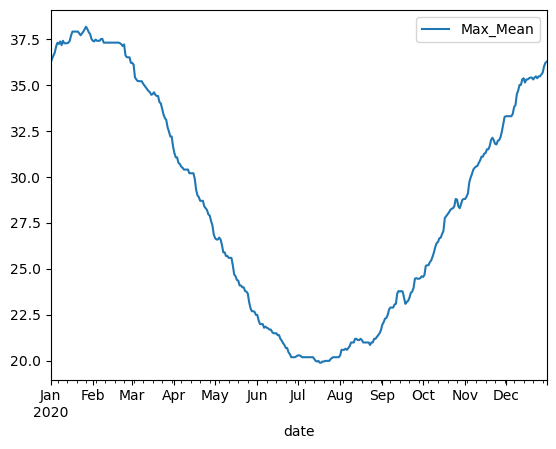

In [16]:
FR.Calendar_Day_Percentile(Mean_D,85,"Max_Mean", 1961, 1990, 7,Dates).set_index('date').plot()

Now we have the appropriate CDPs and we know it works, therefore we can now build a for loop that satrts from 1830 and finishes by 2020 for every 5 years, and then plot these on a graph in term sof heatwaves in different periods and have an analysis on this

In [17]:
del Mean_D['month']
del Mean_D['year']
del Mean_D['day']

Heatwaves, CDP_periods =  FR.Heatwave_Function_v5(Mean_D, Dates, [],85,7,[1961,1990])

In [18]:
Heatwaves

date   id Rowes Heatwave Categorisation  Tmax  Tmin  Duration  \
0   1831-03-16    1                     RHC Cat 2  35.6  20.1         4   
1   1831-03-17    1                     RHC Cat 2  38.7  20.8         4   
2   1831-03-18    1                     RHC Cat 2  37.6  19.4         4   
3   1831-03-19    1                     RHC Cat 2  37.3  20.8         4   
4   1843-11-25    2                     RHC Cat 5  41.0  15.3         4   
..         ...  ...                           ...   ...   ...       ...   
970 2020-12-11  198                     RHC Cat 4  32.3  23.7         4   
971 2021-01-07  199                     RHC Cat 2  38.6  22.0         4   
972 2021-01-08  199                     RHC Cat 2  41.5  20.1         4   
973 2021-01-09  199                     RHC Cat 2  38.1  23.8         4   
974 2021-01-10  199                     RHC Cat 2  28.0  21.6         4   

     Peak Intensity  EHF_Mx  HS_Mx  EH_Mx  ...  HS_Mx HW Mean  EH_Mx HW Mean  \
0              20.2     3.1    2.8    1.1  ...            4.3            2.8   
1              20.2    18.5    4.5    4.1  ...            4.3            2.8   
2              20.2    14.8    4.7    3.1  ...            4.3            2.8   
3              20.2    15.2    5.2    2.9  ...            4.3            2.8   
4              88.1   114.2   12.6    9.0  ...           12.0            3.4   
..              ...     ...    ...    ...  ...            ...            ...   
970            47.1   -24.4    9.0   -2.7  ...           10.0            1.7   
971            15.4     3.8    2.8    1.4  ...            3.8           -0.8   
972            15.4    21.0    5.1    4.1  ...            3.8           -0.8   
973            15.4     5.2    5.5    0.9  ...            3.8           -0.8   
974            15.4   -19.2    2.0   -9.4  ...            3.8           -0.8   

     EHF_Mn HW Mean  HS_Mn HW Mean  EH_Mn HW Mean  EHF_avg HW Mean  \
0               3.6            2.9            1.2              8.2   
1               3.6            2.9            1.2              8.2   
2               3.6            2.9            1.2              8.2   
3               3.6            2.9            1.2              8.2   
4               3.6            5.2            0.4             28.6   
..              ...            ...            ...              ...   
970            23.0            6.1            2.8             19.2   
971             5.2            3.0            1.6              4.0   
972             5.2            3.0            1.6              4.0   
973             5.2            3.0            1.6              4.0   
974             5.2            3.0            1.6              4.0   

     HS_avg HW Mean  EH_avg HW Mean  Total Excess Heat Factor  Total Intenisty  
0               3.6             2.0                       5.1             16.5  
1               3.6             2.0                      24.5             16.5  
2               3.6             2.0                      15.7             16.5  
3               3.6             2.0                      20.5             16.5  
4               8.6             2.0                     109.9             57.2  
..              ...             ...                       ...              ...  
970             8.0             2.2                      30.9             38.5  
971             3.4             0.4                       7.1              8.0  
972             3.4             0.4                      20.1              8.0  
973             3.4             0.4                      19.0              8.0  
974             3.4             0.4                     -14.4              8.0  

[975 rows x 31 columns]

In [19]:
UPDATE=False
LowerBoundBP = np.arange(1831,1991+1,5)
UpperBoundBP = np.arange(1860,2020+1,5)

#cCapture the extended summer
April = 4
October = 10
StartDay = 1
EndDay = 30

#Now add a for loop into this
Heatwave_T = []
Heatwave_H = []
Heatwave_WW1 = []
Heatwave_CW = []
Heatwave_CC = []
if UPDATE==True:
    for i in range(0,len(UpperBoundBP)):
        print(i)
        #Find the heatwaves
        Heatwaves, CDP_periods =  FR.Heatwave_Function_v5(Mean_D, Dates, [],85,7,[LowerBoundBP[i],UpperBoundBP[i]])
        Heatwaves.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_{}_{}_85_7".format(LowerBoundBP[i],UpperBoundBP[i]))
        CDP_periods.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_{}_{}_85_7".format(LowerBoundBP[i],UpperBoundBP[i]))    

        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')

        Heatwaves_HIST = Heatwaves.loc['1830-10-1':'1875-4-30']
        Heatwaves_WW1 = Heatwaves.loc['1880-10-1':'1925-4-30']
        Heatwaves_COLDWAR = Heatwaves.loc['1925-10-1':'1970-4-30']
        Heatwaves_CLIMCHAN = Heatwaves.loc['1970-10-1':'2020-4-30']


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()


        events_h = Heatwaves_HIST['id'].max() - Heatwaves_HIST['id'].min()
        events_ww1 = Heatwaves_WW1['id'].max() - Heatwaves_WW1['id'].min()
        events_cw = Heatwaves_COLDWAR['id'].max() - Heatwaves_COLDWAR['id'].min()
        events_cc = Heatwaves_CLIMCHAN['id'].max() - Heatwaves_CLIMCHAN['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t)
        Heatwave_H.append(events_h)
        Heatwave_WW1.append(events_ww1)
        Heatwave_CW.append(events_cw)
        Heatwave_CC.append(events_cc)
else:
    for i in range(0,len(UpperBoundBP)):
        print(i)
        #Find the heatwaves
        Heatwaves = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_{}_{}_85_7".format(LowerBoundBP[i],UpperBoundBP[i]))
        CDP_periods= pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_{}_{}_85_7".format(LowerBoundBP[i],UpperBoundBP[i]))    
        Heatwaves['date'] = pd.to_datetime(Heatwaves['date'], dayfirst = True)
        CDP_periods['date'] = pd.to_datetime(CDP_periods['date'], dayfirst = True)
        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')

        Heatwaves_HIST = Heatwaves.loc['1830-10-1':'1875-4-30']
        Heatwaves_WW1 = Heatwaves.loc['1880-10-1':'1925-4-30']
        Heatwaves_COLDWAR = Heatwaves.loc['1925-10-1':'1970-4-30']
        Heatwaves_CLIMCHAN = Heatwaves.loc['1970-10-1':'2020-4-30']


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()


        events_h = Heatwaves_HIST['id'].max() - Heatwaves_HIST['id'].min()
        events_ww1 = Heatwaves_WW1['id'].max() - Heatwaves_WW1['id'].min()
        events_cw = Heatwaves_COLDWAR['id'].max() - Heatwaves_COLDWAR['id'].min()
        events_cc = Heatwaves_CLIMCHAN['id'].max() - Heatwaves_CLIMCHAN['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t)
        Heatwave_H.append(events_h)
        Heatwave_WW1.append(events_ww1)
        Heatwave_CW.append(events_cw)
        Heatwave_CC.append(events_cc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


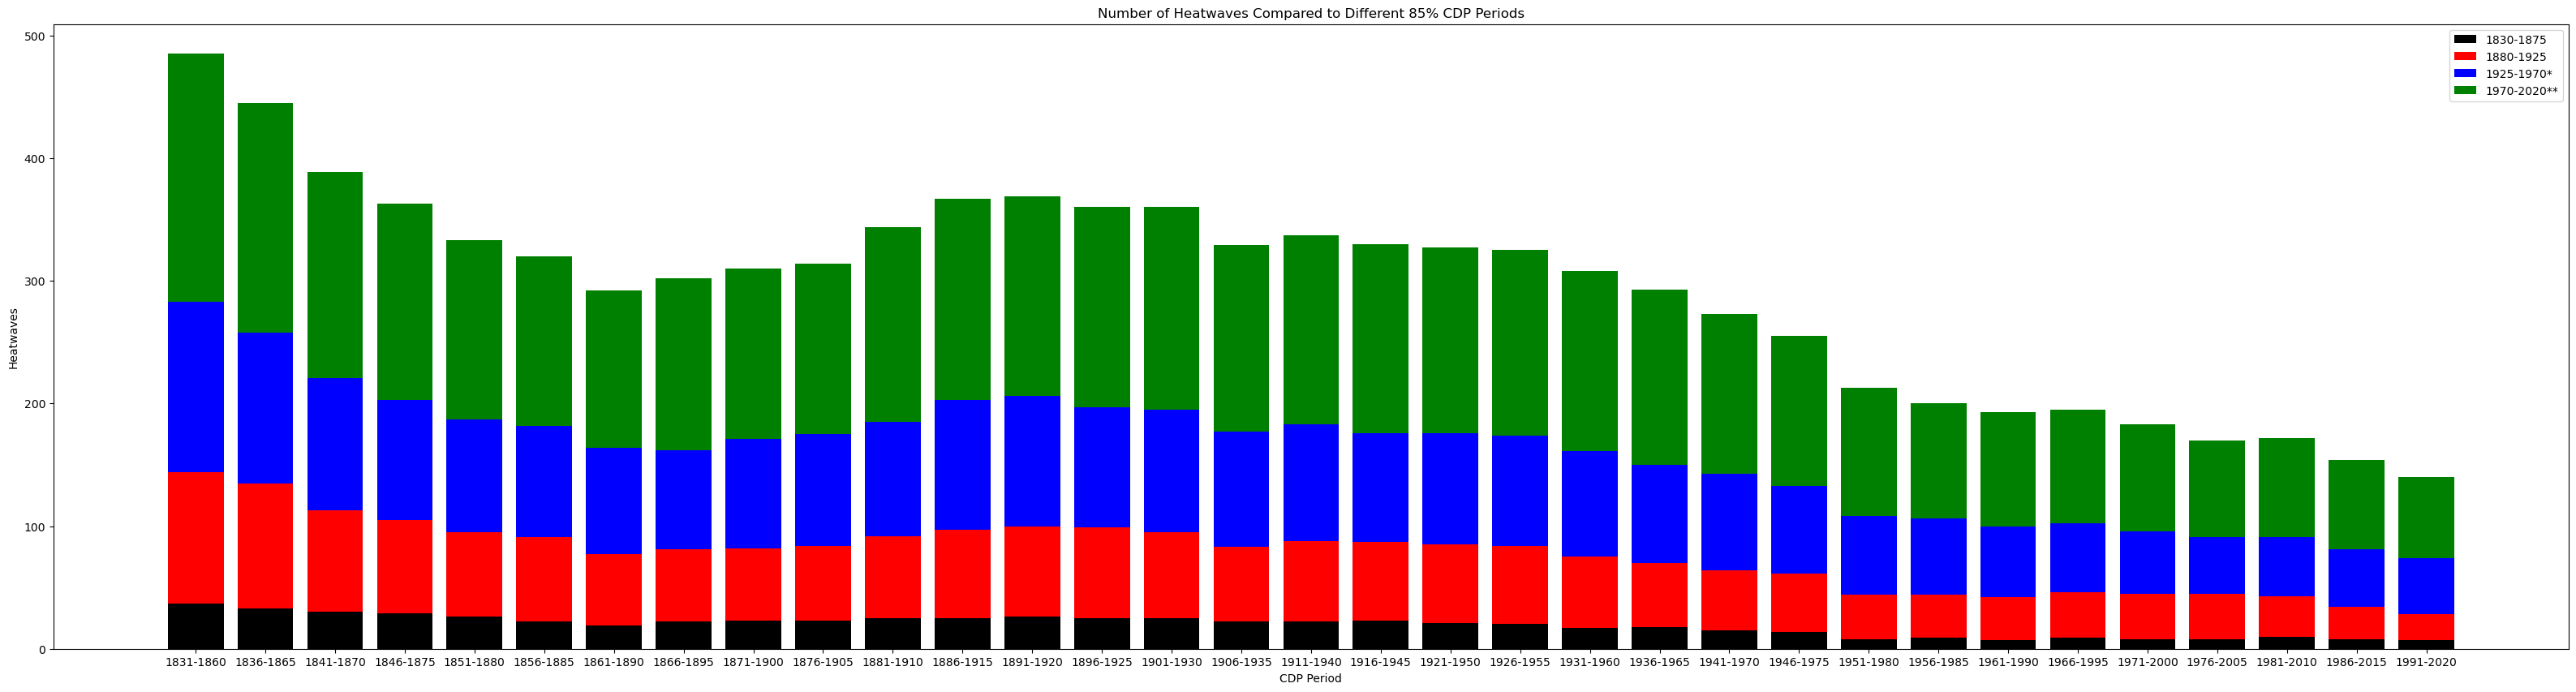

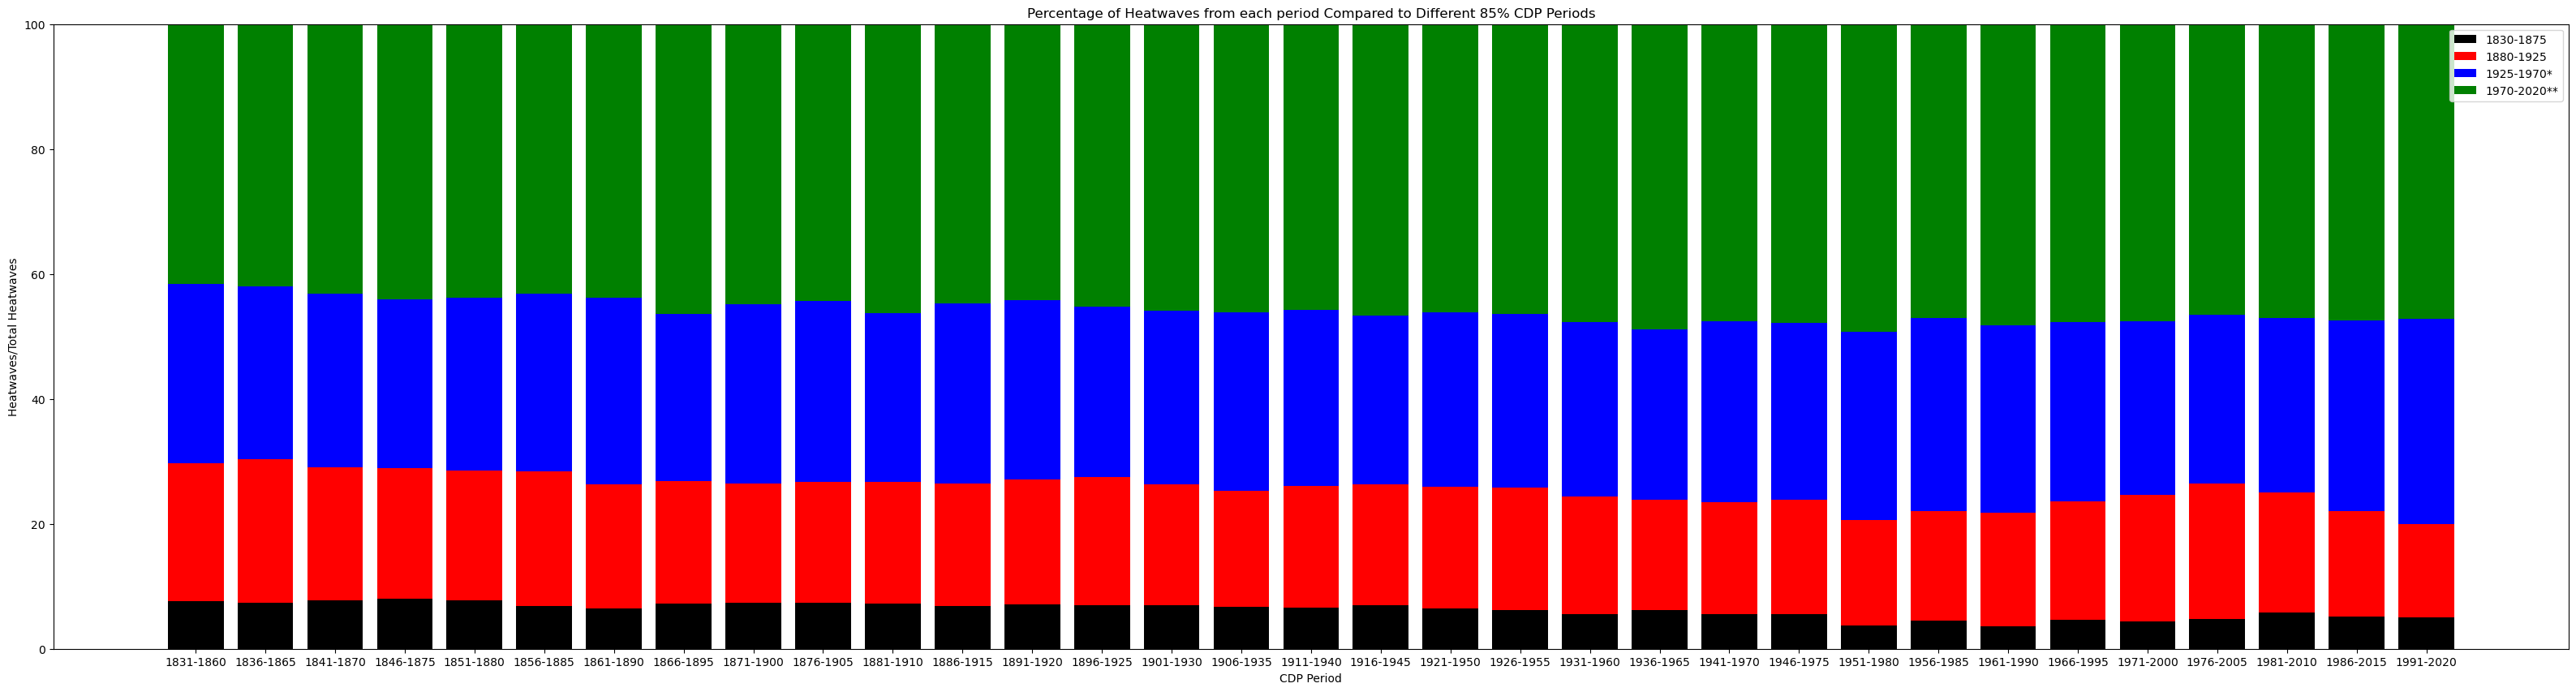

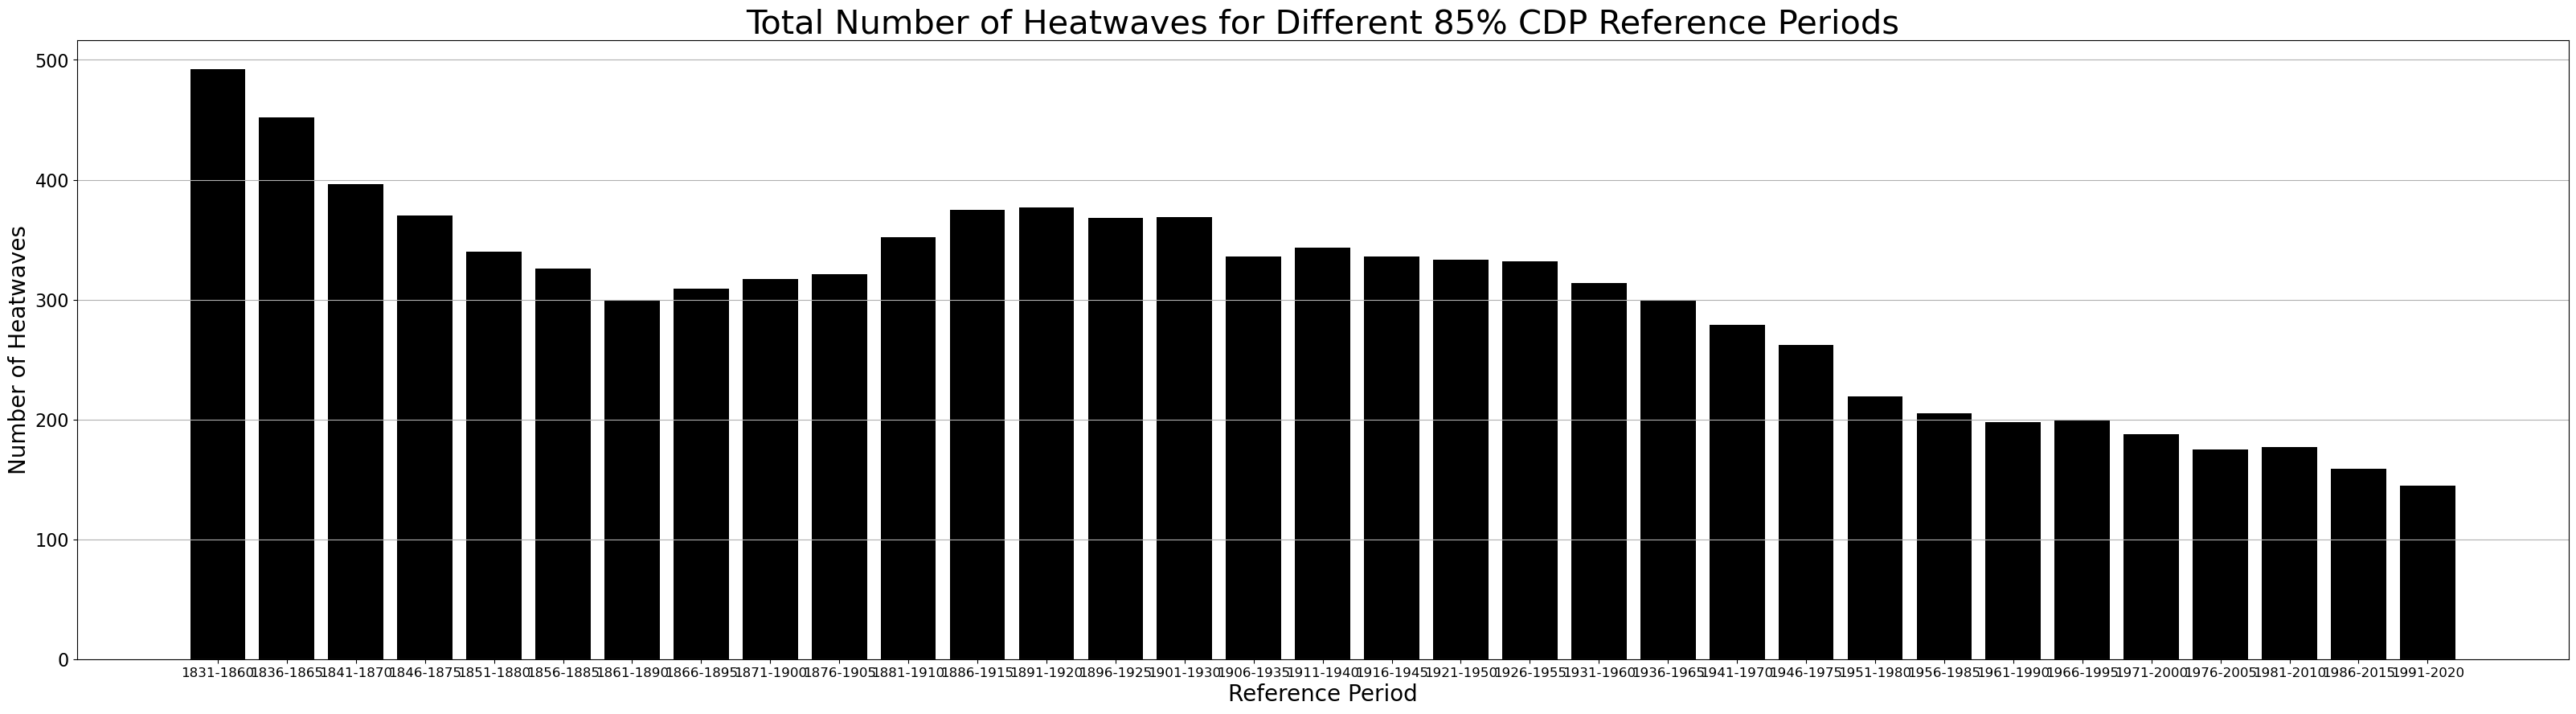

In [20]:
Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (40,10))   
plt.bar(Base_Periods, Heatwave_H, color='k')
plt.bar(Base_Periods, Heatwave_WW1, bottom=Heatwave_H,color='r')
plt.bar(Base_Periods, Heatwave_CW, bottom=np.add(Heatwave_WW1,Heatwave_H), color='b')
plt.bar(Base_Periods, Heatwave_CC, bottom=np.add(Heatwave_CW,np.add(Heatwave_WW1,Heatwave_H)), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves")
plt.legend(["1830-1875","1880-1925", "1925-1970*", "1970-2020**"])
plt.title("Number of Heatwaves Compared to Different 85% CDP Periods")
plt.show()


#Percentage based
Total_Heatwaves = np.add(np.add(np.add(Heatwave_WW1,Heatwave_H),Heatwave_CW),Heatwave_CC)
Percentage_H = np.multiply(np.divide(Heatwave_H,Total_Heatwaves),100)
Percentage_WW1 = np.multiply(np.divide(Heatwave_WW1,Total_Heatwaves),100)
Percentage_CW = np.multiply(np.divide(Heatwave_CW,Total_Heatwaves),100)
Percentage_CC = np.multiply(np.divide(Heatwave_CC,Total_Heatwaves),100)


Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (40,10))   
plt.bar(Base_Periods, Percentage_H, color='k')
plt.bar(Base_Periods, Percentage_WW1, bottom=Percentage_H,color='r')
plt.bar(Base_Periods, Percentage_CW, bottom=np.add(Percentage_WW1,Percentage_H), color='b')
plt.bar(Base_Periods, Percentage_CC, bottom=np.add(Percentage_CW,np.add(Percentage_WW1,Percentage_H)), color='g')

plt.xlabel("CDP Period")
plt.ylabel("Heatwaves/Total Heatwaves")
plt.legend(["1830-1875","1880-1925", "1925-1970*", "1970-2020**"])
plt.title("Percentage of Heatwaves from each period Compared to Different 85% CDP Periods")
plt.ylim([0,100])
plt.show()

#%%

Base_Periods = []
for i in range(0,len(UpperBoundBP)):
    xx = '{}-{}'.format(LowerBoundBP[i],UpperBoundBP[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (40,10))   
plt.bar(Base_Periods, Heatwave_T, color='black')


plt.xlabel("Reference Period",fontsize = 20)
plt.ylabel("Number of Heatwaves",fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis = 'y')

plt.title("Total Number of Heatwaves for Different 85% CDP Reference Periods",fontsize =30)
plt.show()

Now to do this but for different percentile values, starting from 75% and going up by 2.5% to 95%

75.0
77.5
80.0
82.5
85.0
87.5
90.0
92.5


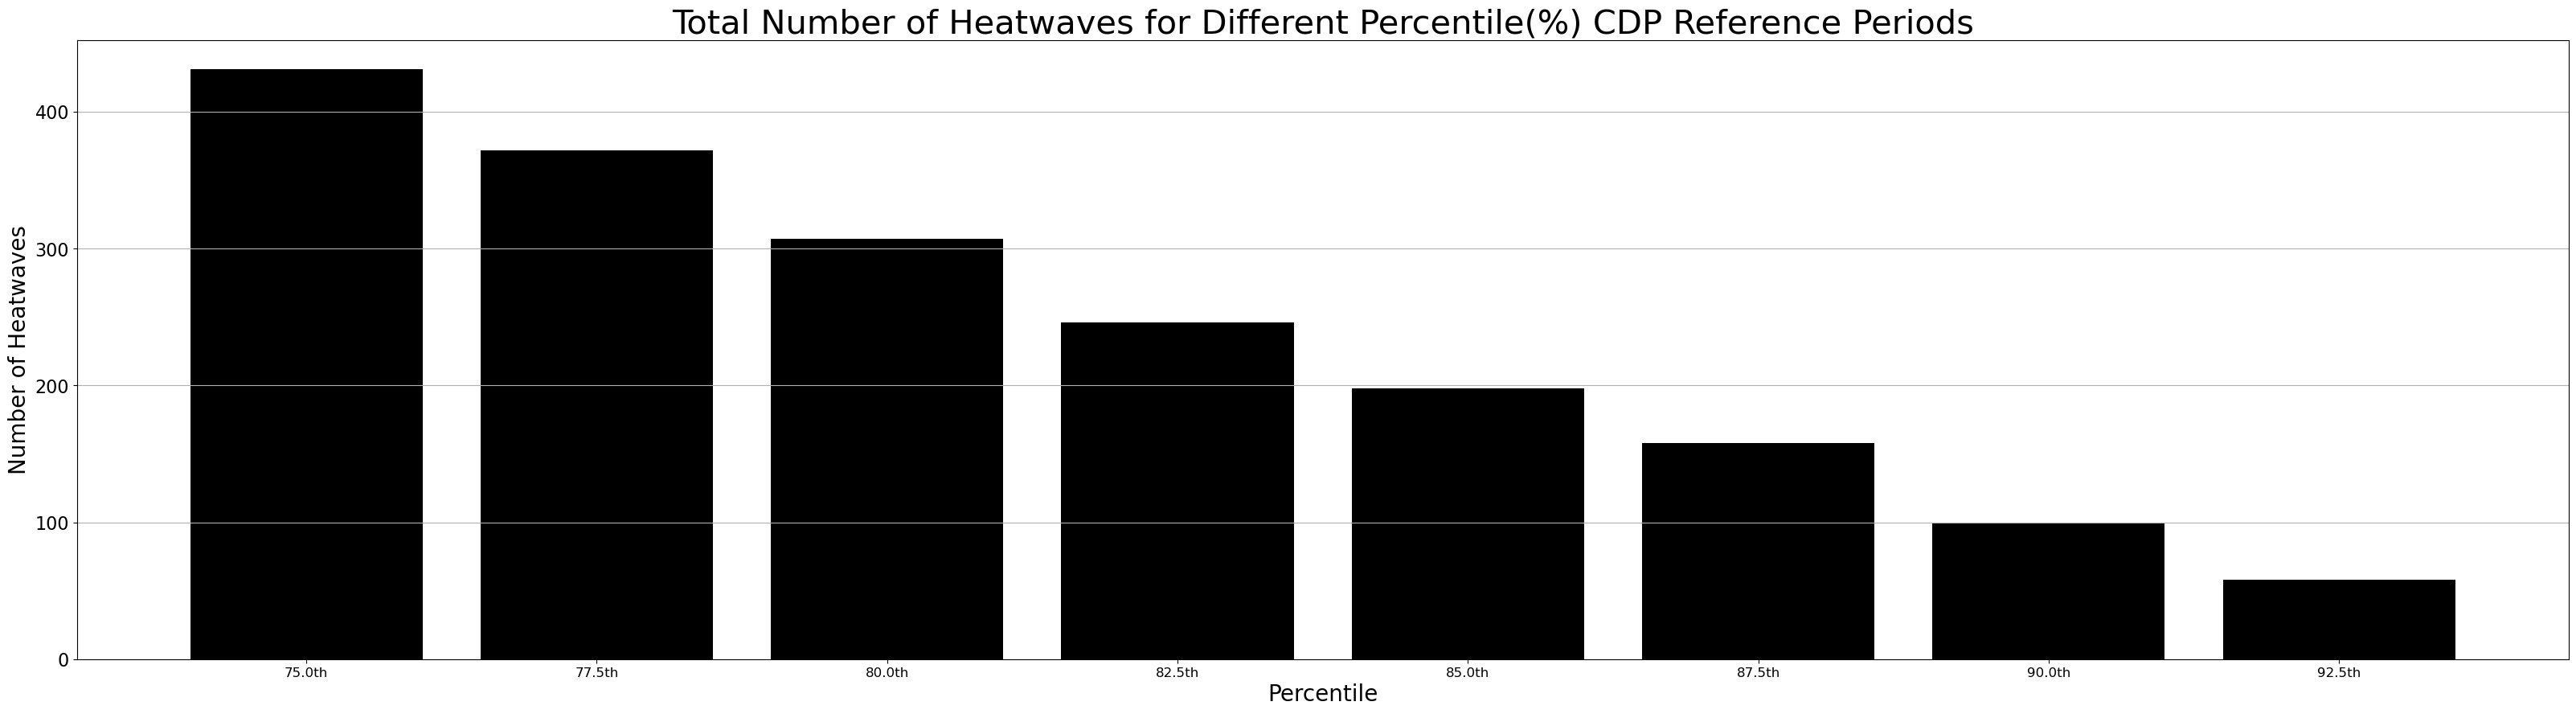

In [21]:

#Now add a for loop into this
Heatwave_T = []
if UPDATE == True:
    for i in np.arange(75,95,2.5):
        print(i)
        #Find the heatwaves
        Heatwaves, CDP_periods =  FR.Heatwave_Function_v5(Mean_D, Dates, [],i,7,[1961,1990])
        Heatwaves.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_1961_1990_{}_7".format(i))
        CDP_periods.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_1961_1990_{}_7".format(i))

        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t)
else:
    for i in np.arange(75,95,2.5):
        print(i)
        #Find the heatwaves
        Heatwaves =pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_1961_1990_{}_7".format(i))
        CDP_periods = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_1961_1990_{}_7".format(i))
        Heatwaves['date'] = pd.to_datetime(Heatwaves['date'], dayfirst = True)
        CDP_periods['date'] = pd.to_datetime(CDP_periods['date'], dayfirst = True)
        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t)
        
        
        
#%%

Base_Periods = []
XX = np.arange(75,95,2.5)
for i in range(0,len(Heatwave_T)):
    
    xx = '{}th'.format(XX[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (40,10))   
plt.bar(Base_Periods, Heatwave_T, color='black')


plt.xlabel("Percentile",fontsize = 20)
plt.ylabel("Number of Heatwaves",fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis = 'y')

plt.title("Total Number of Heatwaves for Different Percentile(%) CDP Reference Periods",fontsize =30)
plt.show()

 np.arange(75,2.5,95)

3
4
5
6
7
8
9
10
11
12
13
14


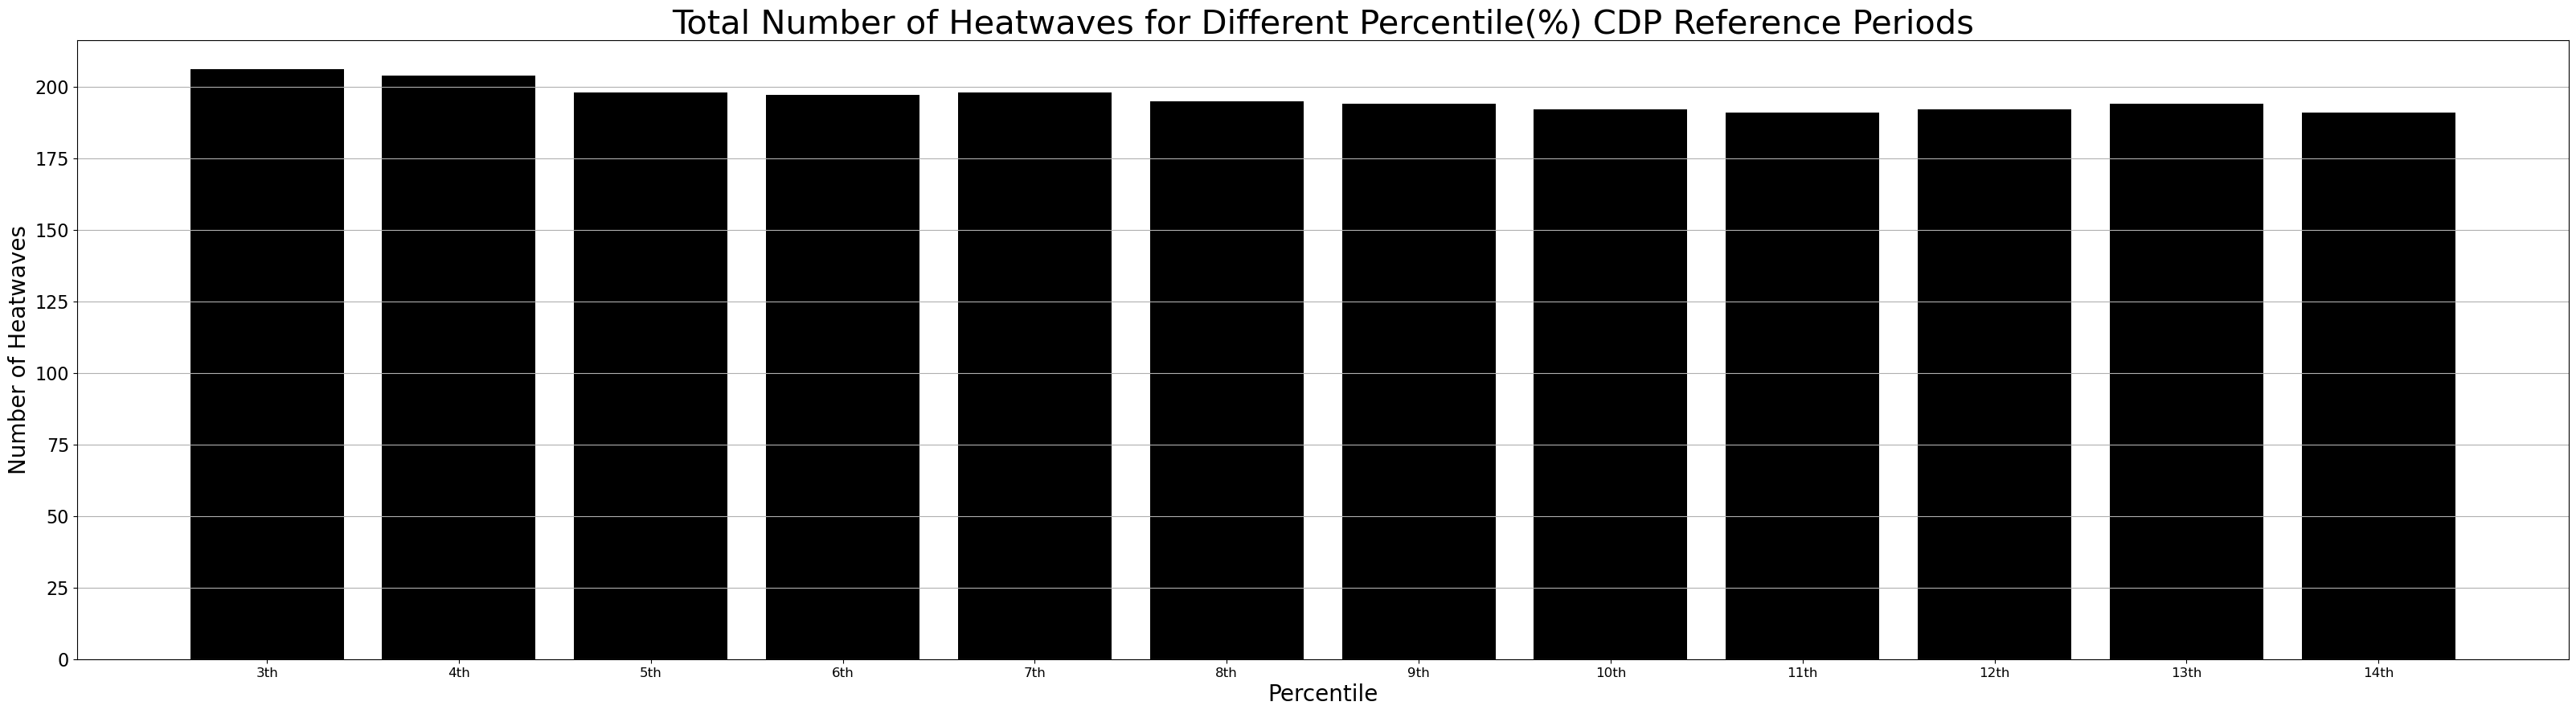

In [22]:

#Now add a for loop into this
Heatwave_T = []
if UPDATE == True:
    
    for i in np.arange(3,15,1):
        print(i)
        #Find the heatwaves
        Heatwaves, CDP_periods =  FR.Heatwave_Function_v5(Mean_D, Dates, [],85,i,[1961,1990])
        Heatwaves.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_1961_1990_85_{}".format(i))
        CDP_periods.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_1961_1990_85_{}".format(i))

        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t)
else:
    for i in np.arange(3,15,1):
        print(i)
        #Find the heatwaves
        Heatwaves = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\HW_1961_1990_85_{}".format(i))
        CDP_periods=pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\CDP_1961_1990_85_{}".format(i))

        #Now split into 3 periods
        Heatwaves = Heatwaves.set_index('date')


        #Number of heatwaves for each period
        events_t = Heatwaves['id'].max() - Heatwaves['id'].min()

        #Append the number to the rest
        Heatwave_T.append(events_t) 
#%%

Base_Periods = []
XX = np.arange(3,15,1)
for i in range(0,len(Heatwave_T)):
    
    xx = '{}th'.format(XX[i])
    Base_Periods.append(xx)
    
plt.figure(figsize = (40,10))   
plt.bar(Base_Periods, Heatwave_T, color='black')


plt.xlabel("Percentile",fontsize = 20)
plt.ylabel("Number of Heatwaves",fontsize = 20)
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=16)
plt.grid(axis = 'y')

plt.title("Total Number of Heatwaves for Different Percentile(%) CDP Reference Periods",fontsize =30)
plt.show()

# HEATWAVE FUNCTION OVER MANY TRIALS

Now I apply my heatwave function over the 1000 trials and save this as a dateframe.

Things to note:

    I need to ensure that all 100o trials have been completed
    I need to figure out how to savce dictionaries for recall
    I need to know how to take a sum of when a date is within a heatwave
    






In [25]:
Data_1000 = Data.reset_index().copy()
Data_1000
#columns = Max and Min

date  Max_1  Min_1  Max_2  Min_2  Max_3  Min_3  Max_4  Min_4  \
0     1830-04-16   25.1    NaN   25.1    NaN   25.1    NaN   25.1    NaN   
1     1830-04-17   25.8   10.7   25.8   10.8   25.8   10.8   25.8   11.6   
2     1830-04-18   28.3   13.4   28.3   13.3   28.5   13.0   27.8   13.3   
3     1830-04-19   26.7   14.0   26.3   14.0   26.6   13.9   26.3   14.2   
4     1830-04-20   24.4    7.8   24.3    7.9   24.1    7.9   24.4    7.8   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
69834 2021-06-26   20.3    5.8   20.3    5.8   20.3    5.8   20.3    5.8   
69835 2021-06-27   15.6    8.7   15.6    8.7   15.6    8.7   15.6    8.7   
69836 2021-06-28   19.7   10.5   19.7   10.5   19.7   10.5   19.7   10.5   
69837 2021-06-29   18.0   12.5   18.0   12.5   18.0   12.5   18.0   12.5   
69838 2021-06-30   16.8    7.7   16.8    7.7   16.8    7.7   16.8    7.7   

       Max_5  ...  Max_996  Min_996  Max_997  Min_997  Max_998  Min_998  \
0       25.1  ...     25.1      NaN     25.1      NaN     25.1      NaN   
1       25.8  ...     25.8     10.7     25.8     10.6     25.8     10.7   
2       28.1  ...     28.4     13.1     28.3     13.0     27.8     13.0   
3       26.3  ...     26.2     14.0     26.2     14.0     26.6     13.9   
4       24.3  ...     24.4      7.8     24.3      7.8     24.4      7.8   
...      ...  ...      ...      ...      ...      ...      ...      ...   
69834   20.3  ...     20.3      5.8     20.3      5.8     20.3      5.8   
69835   15.6  ...     15.6      8.7     15.6      8.7     15.6      8.7   
69836   19.7  ...     19.7     10.5     19.7     10.5     19.7     10.5   
69837   18.0  ...     18.0     12.5     18.0     12.5     18.0     12.5   
69838   16.8  ...     16.8      7.7     16.8      7.7     16.8      7.7   

       Max_999  Min_999  Max_1000  Min_1000  
0         25.1      NaN      25.1       NaN  
1         25.8     10.9      25.8      10.6  
2         28.1     13.4      28.1      13.2  
3         26.3     14.1      26.2      13.9  
4         24.4      7.8      24.4       7.8  
...        ...      ...       ...       ...  
69834     20.3      5.8      20.3       5.8  
69835     15.6      8.7      15.6       8.7  
69836     19.7     10.5      19.7      10.5  
69837     18.0     12.5      18.0      12.5  
69838     16.8      7.7      16.8       7.7  

[69839 rows x 2001 columns]

In [30]:
#First iteration
Heatwaves, CDP =  FR.Heatwave_Function_v5(Data_1000[['date','Max_1','Min_1']], Dates, [],85,7,[1961,1990])
#The add to dictionary

#Second Iteration
Heatwaves, Discard =  FR.Heatwave_Function_v5(Data_1000[['date','Max_2','Min_2']], Dates, CDP,85,7,[1961,1990])


In [31]:
Heatwaves

date   id Rowes Heatwave Categorisation  Tmax  Tmin  Duration  \
0   1830-12-04    1                     RHC Cat 2  34.3  19.6         3   
1   1830-12-05    1                     RHC Cat 2  40.3  15.6         3   
2   1830-12-06    1                     RHC Cat 2  33.5  20.9         3   
3   1831-03-16    2                     RHC Cat 2  35.7  20.2         4   
4   1831-03-17    2                     RHC Cat 2  38.9  20.9         4   
..         ...  ...                           ...   ...   ...       ...   
974 2020-12-11  199                     RHC Cat 4  32.3  23.7         4   
975 2021-01-07  200                     RHC Cat 2  38.6  22.0         4   
976 2021-01-08  200                     RHC Cat 2  41.5  20.1         4   
977 2021-01-09  200                     RHC Cat 2  38.1  23.8         4   
978 2021-01-10  200                     RHC Cat 2  28.0  21.6         4   

     Peak Intensity  EHF_Mx  HS_Mx  EH_Mx  ...  HS_Mx HW Mean  EH_Mx HW Mean  \
0              28.3     2.9    2.9    1.0  ...            6.6            2.7   
1              28.3    57.0    8.1    7.0  ...            6.6            2.7   
2              28.3     0.6    8.8    0.1  ...            6.6            2.7   
3              20.8     3.3    2.8    1.2  ...            4.4            2.8   
4              20.8    19.8    4.6    4.3  ...            4.4            2.8   
..              ...     ...    ...    ...  ...            ...            ...   
974            47.1   -24.4    9.0   -2.7  ...           10.0            1.7   
975            15.4     3.8    2.8    1.4  ...            3.8           -0.8   
976            15.4    21.0    5.1    4.1  ...            3.8           -0.8   
977            15.4     5.2    5.5    0.9  ...            3.8           -0.8   
978            15.4   -19.2    2.0   -9.4  ...            3.8           -0.8   

     EHF_Mn HW Mean  HS_Mn HW Mean  EH_Mn HW Mean  EHF_avg HW Mean  \
0               8.1            5.3            1.3             14.1   
1               8.1            5.3            1.3             14.1   
2               8.1            5.3            1.3             14.1   
3               3.9            3.0            1.2              8.5   
4               3.9            3.0            1.2              8.5   
..              ...            ...            ...              ...   
974            23.0            6.1            2.8             19.2   
975             5.2            3.0            1.6              4.0   
976             5.2            3.0            1.6              4.0   
977             5.2            3.0            1.6              4.0   
978             5.2            3.0            1.6              4.0   

     HS_avg HW Mean  EH_avg HW Mean  Total Excess Heat Factor  Total Intenisty  
0               5.9             2.0                      11.8             28.3  
1               5.9             2.0                      48.1             28.3  
2               5.9             2.0                      25.0             28.3  
3               3.7             2.0                       5.6             17.0  
4               3.7             2.0                      26.4             17.0  
..              ...             ...                       ...              ...  
974             8.0             2.2                      30.9             38.5  
975             3.4             0.4                       7.1              8.0  
976             3.4             0.4                      20.1              8.0  
977             3.4             0.4                      19.0              8.0  
978             3.4             0.4                     -14.4              8.0  

[979 rows x 31 columns]

In [35]:
date_counts = Heatwaves['date'].value_counts().reset_index()
date_counts
date_counts.columns = ['date', 'count']
date_counts

date  count
0   1830-12-04      1
1   1994-11-08      1
2   1994-11-15      1
3   1994-11-16      1
4   1994-12-15      1
..         ...    ...
974 1951-03-22      1
975 1952-12-11      1
976 1952-12-12      1
977 1952-12-13      1
978 2021-01-10      1

[979 rows x 2 columns]

In [37]:
# Create a new dataframe with date and count columns
new_df = pd.DataFrame({
    'date': date_counts['date'],
    'count': date_counts['count']
})

# Merge the new dataframe with the original dataframe
merged_df = pd.merge(Data_1000['date'], new_df, on='date', how='left')

In [48]:
Total_Counts['count'] = Total_Counts['count'] + merged_df['count']

In [45]:
Total_Counts = merged_df

In [50]:
Total_Counts[Total_Counts['count']==2]

date  count
232   1830-12-04    2.0
233   1830-12-05    2.0
234   1830-12-06    2.0
334   1831-03-16    2.0
335   1831-03-17    2.0
...          ...    ...
69637 2020-12-11    2.0
69664 2021-01-07    2.0
69665 2021-01-08    2.0
69666 2021-01-09    2.0
69667 2021-01-10    2.0

[979 rows x 2 columns]

In [150]:
#First iteration:
#Extract the heatwave and CDP, CDP will be the same as this is fixed after 1880.
Heatwaves, CDP =  FR.Heatwave_Function_v5(Data_1000[['date','Max_1','Min_1']], Dates, [],85,7,[1961,1990])
#setup dictionary
heatwave_trials = {}

#Add the first trail into the dictioanry
heatwave_trials["HW_Trial_1"] = Heatwaves

#Now setup the count environment for the number of days that have HW evetns for each trial
#count the days with the date as 1 and 0 for non existing days
date_counts = Heatwaves['date'].value_counts().reset_index()
#Rename the columns
date_counts.columns = ['date', 'count']

# Create a new dataframe with date and count columns
new_df = pd.DataFrame({
    'date': date_counts['date'],
    'count': date_counts['count']
})

# Merge the new dataframe with the Data dataframe dates so only nans and 1 are in the dataframe
counts_merged_data = pd.merge(Data_1000['date'], new_df, on='date', how='left')

counts_merged_data = counts_merged_data.fillna(0)
#Set this as the first iteration of the total count
Total_Counts['count'] =  counts_merged_data['count']

#Then to the for loop
for i in range(2,1000+1):
    print(i)
    #Extract the heatwave and Dsicard, as we are using CDP from the first iteration
    Heatwaves, Discard =  FR.Heatwave_Function_v5(Data_1000[['date','Max_{}'.format(i),'Min_{}'.format(i)]], Dates, CDP,85,7,[1961,1990])

    #Add the first trail into the dictioanry
    heatwave_trials["HW_Trial_{}".format(i)] = Heatwaves

    #Now setup the count environment for the number of days that have HW evetns for each trial
    #count the days with the date as 1 and 0 for non existing days
    date_counts = Heatwaves['date'].value_counts().reset_index()
    #Rename the columns
    date_counts.columns = ['date', 'count']

    # Create a new dataframe with date and count columns
    new_df = pd.DataFrame({
        'date': date_counts['date'],
        'count': date_counts['count']
    })

    # Merge the new dataframe with the Data dataframe dates so only nans and 1 are in the dataframe
    counts_merged_data = pd.merge(Data_1000['date'], new_df, on='date', how='left')

    counts_merged_data = counts_merged_data.fillna(0)
    #Set this as the first iteration of the total count
    Total_Counts['count'] = Total_Counts['count'] + counts_merged_data['count']


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

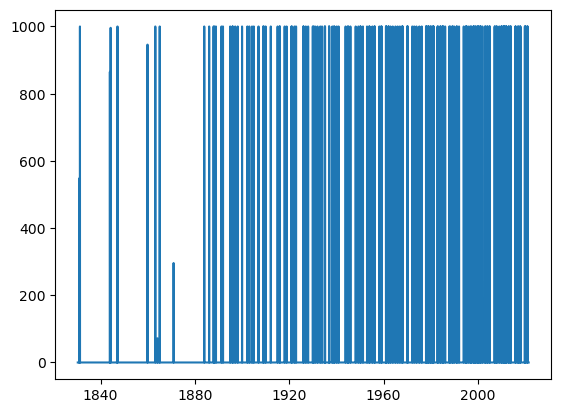

In [152]:

Total_Counts[Total_Counts['count']==30]
plt.plot(Total_Counts['date'],Total_Counts['count'])



In [154]:
heatwave_trials

{'HW_Trial_1':           date   id Rowes Heatwave Categorisation  Tmax  Tmin  Duration  \
 0   1831-01-22    1                     RHC Cat 3  39.7  19.5         6   
 1   1831-01-23    1                     RHC Cat 3  41.0  20.4         6   
 2   1831-01-24    1                     RHC Cat 3  41.5  22.3         6   
 3   1831-01-25    1                     RHC Cat 3  37.6  22.0         6   
 4   1831-01-26    1                     RHC Cat 3  41.5  20.4         6   
 ..         ...  ...                           ...   ...   ...       ...   
 995 2020-12-11  201                     RHC Cat 4  32.3  23.7         4   
 996 2021-01-07  202                     RHC Cat 2  38.6  22.0         4   
 997 2021-01-08  202                     RHC Cat 2  41.5  20.1         4   
 998 2021-01-09  202                     RHC Cat 2  38.1  23.8         4   
 999 2021-01-10  202                     RHC Cat 2  28.0  21.6         4   
 
      Peak Intensity  EHF_Mx  HS_Mx  EH_Mx  ...  HS_Mx HW Mean  EH_Mx HW

In [137]:
heatwave_trials.get("HW_Trial_2")

date   id Rowes Heatwave Categorisation  Tmax  Tmin  Duration  \
0   1830-12-04    1                     RHC Cat 2  34.3  19.6         3   
1   1830-12-05    1                     RHC Cat 2  40.3  15.6         3   
2   1830-12-06    1                     RHC Cat 2  33.5  20.9         3   
3   1831-03-16    2                     RHC Cat 2  35.7  20.2         4   
4   1831-03-17    2                     RHC Cat 2  38.9  20.9         4   
..         ...  ...                           ...   ...   ...       ...   
974 2020-12-11  199                     RHC Cat 4  32.3  23.7         4   
975 2021-01-07  200                     RHC Cat 2  38.6  22.0         4   
976 2021-01-08  200                     RHC Cat 2  41.5  20.1         4   
977 2021-01-09  200                     RHC Cat 2  38.1  23.8         4   
978 2021-01-10  200                     RHC Cat 2  28.0  21.6         4   

     Peak Intensity  EHF_Mx  HS_Mx  EH_Mx  ...  HS_Mx HW Mean  EH_Mx HW Mean  \
0              28.3     2.9    2.9    1.0  ...            6.6            2.7   
1              28.3    57.0    8.1    7.0  ...            6.6            2.7   
2              28.3     0.6    8.8    0.1  ...            6.6            2.7   
3              20.8     3.3    2.8    1.2  ...            4.4            2.8   
4              20.8    19.8    4.6    4.3  ...            4.4            2.8   
..              ...     ...    ...    ...  ...            ...            ...   
974            47.1   -24.4    9.0   -2.7  ...           10.0            1.7   
975            15.4     3.8    2.8    1.4  ...            3.8           -0.8   
976            15.4    21.0    5.1    4.1  ...            3.8           -0.8   
977            15.4     5.2    5.5    0.9  ...            3.8           -0.8   
978            15.4   -19.2    2.0   -9.4  ...            3.8           -0.8   

     EHF_Mn HW Mean  HS_Mn HW Mean  EH_Mn HW Mean  EHF_avg HW Mean  \
0               8.1            5.3            1.3             14.1   
1               8.1            5.3            1.3             14.1   
2               8.1            5.3            1.3             14.1   
3               3.9            3.0            1.2              8.5   
4               3.9            3.0            1.2              8.5   
..              ...            ...            ...              ...   
974            23.0            6.1            2.8             19.2   
975             5.2            3.0            1.6              4.0   
976             5.2            3.0            1.6              4.0   
977             5.2            3.0            1.6              4.0   
978             5.2            3.0            1.6              4.0   

     HS_avg HW Mean  EH_avg HW Mean  Total Excess Heat Factor  Total Intenisty  
0               5.9             2.0                      11.8             28.3  
1               5.9             2.0                      48.1             28.3  
2               5.9             2.0                      25.0             28.3  
3               3.7             2.0                       5.6             17.0  
4               3.7             2.0                      26.4             17.0  
..              ...             ...                       ...              ...  
974             8.0             2.2                      30.9             38.5  
975             3.4             0.4                       7.1              8.0  
976             3.4             0.4                      20.1              8.0  
977             3.4             0.4                      19.0              8.0  
978             3.4             0.4                     -14.4              8.0  

[979 rows x 31 columns]

In [132]:
#Now setup the count environment for the number of days that have HW evetns for each trial
#count the days with the date as 1 and 0 for non existing days


H1 = heatwave_trials.get("HW_Trial_1")
H2 = heatwave_trials.get("HW_Trial_2")
H3 = heatwave_trials.get("HW_Trial_3")

date_counts = H1['date'].value_counts().reset_index()

date_counts.columns = ['date', 'count']
new_df = pd.DataFrame({'date': date_counts['date'],'count': date_counts['count']})

# Merge the new dataframe with the Data dataframe dates so only nans and 1 are in the dataframe
counts_merged_data = pd.merge(Data_1000['date'], new_df, on='date', how='left')

counts_merged_data = counts_merged_data.fillna(0)


Total_Counts['count'] = counts_merged_data['count']
#Total_Counts
#Set this as the first iteration of the total count
#Total_Counts['count'] = Total_Counts['count'] + counts_merged_data['count']

date_counts = H2['date'].value_counts().reset_index()

date_counts.columns = ['date', 'count']
new_df = pd.DataFrame({'date': date_counts['date'],'count': date_counts['count']})

# Merge the new dataframe with the Data dataframe dates so only nans and 1 are in the dataframe
counts_merged_data = pd.merge(Data_1000['date'], new_df, on='date', how='left')

counts_merged_data = counts_merged_data.fillna(0)



Total_Counts['count'] =Total_Counts['count'] + counts_merged_data['count']
Total_Counts[Total_Counts['count']==2]

#Total_Counts['count'] = Total_Counts['count'] + counts_merged_data['count']

date_counts = H3['date'].value_counts().reset_index()

date_counts.columns = ['date', 'count']
new_df = pd.DataFrame({'date': date_counts['date'],'count': date_counts['count']})

# Merge the new dataframe with the Data dataframe dates so only nans and 1 are in the dataframe
counts_merged_data = pd.merge(Data_1000['date'], new_df, on='date', how='left')

counts_merged_data = counts_merged_data.fillna(0)



Total_Counts['count'] =Total_Counts['count'] + counts_merged_data['count']
Total_Counts[Total_Counts['count']==1]

date  count
286   1831-01-27    1.0
4970  1843-11-24    1.0
5044  1844-02-06    1.0
5045  1844-02-07    1.0
5046  1844-02-08    1.0
5047  1844-02-09    1.0
5048  1844-02-10    1.0
5049  1844-02-11    1.0
10802 1859-11-12    1.0
10803 1859-11-13    1.0
10804 1859-11-14    1.0
10805 1859-11-15    1.0
10806 1859-11-16    1.0
10807 1859-11-17    1.0
10808 1859-11-18    1.0
10809 1859-11-19    1.0
10810 1859-11-20    1.0
14838 1870-11-30    1.0
14839 1870-12-01    1.0
14840 1870-12-02    1.0
14841 1870-12-03    1.0

In [155]:
import pickle


# Save the dictionary to a file
file_path = r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\Heatwave_Trials_Dictionary.pickle"
with open(file_path, "wb") as file:
    pickle.dump(heatwave_trials, file)

In [159]:
file_path = r"C:\Users\jarra\Desktop\Masters Research\Python\Data\HEATWAVE_DATASETS_FOR_ANALYSIS\Heatwave_Count.csv"

Total_Counts.to_csv(file_path)

In [158]:
Total_Counts.tail(50)

date  count
69789 2021-05-12    0.0
69790 2021-05-13    0.0
69791 2021-05-14    0.0
69792 2021-05-15    0.0
69793 2021-05-16    0.0
69794 2021-05-17    0.0
69795 2021-05-18    0.0
69796 2021-05-19    0.0
69797 2021-05-20    0.0
69798 2021-05-21    0.0
69799 2021-05-22    0.0
69800 2021-05-23    0.0
69801 2021-05-24    0.0
69802 2021-05-25    0.0
69803 2021-05-26    0.0
69804 2021-05-27    0.0
69805 2021-05-28    0.0
69806 2021-05-29    0.0
69807 2021-05-30    0.0
69808 2021-05-31    0.0
69809 2021-06-01    0.0
69810 2021-06-02    0.0
69811 2021-06-03    0.0
69812 2021-06-04    0.0
69813 2021-06-05    0.0
69814 2021-06-06    0.0
69815 2021-06-07    0.0
69816 2021-06-08    0.0
69817 2021-06-09    0.0
69818 2021-06-10    0.0
69819 2021-06-11    0.0
69820 2021-06-12    0.0
69821 2021-06-13    0.0
69822 2021-06-14    0.0
69823 2021-06-15    0.0
69824 2021-06-16    0.0
69825 2021-06-17    0.0
69826 2021-06-18    0.0
69827 2021-06-19    0.0
69828 2021-06-20    0.0
69829 2021-06-21    0.0
69830 2021-06-22    0.0
69831 2021-06-23    0.0
69832 2021-06-24    0.0
69833 2021-06-25    0.0
69834 2021-06-26    0.0
69835 2021-06-27    0.0
69836 2021-06-28    0.0
69837 2021-06-29    0.0
69838 2021-06-30    0.0